In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams['figure.figsize']=(20,10)

# Read data

Load the Avocado dataset and create a dataframe. Convert the Date column to appropriate Date type object and set it as the index of the dataframe. Finally sort the dataframe by index.

In [2]:
df = pd.read_csv('avocado_updated.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index()
print(f'Shape of the dataframe: {df.shape}')
df.head()

Shape of the dataframe: (29483, 13)


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise
2015-01-04,51,1.80,2057.29,1200.41,53.55,0.00,803.33,803.33,0.00,0.00,organic,2015,Orlando
2015-01-04,51,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22,conventional,2015,Plains
2015-01-04,51,1.83,7301.30,6.81,630.24,0.00,6664.25,6664.25,0.00,0.00,organic,2015,NorthernNewEngland
2015-01-04,51,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh


# Preprocessing and data exploration

## Drop unnecessary columns
We don't need the first column and the year column as we can easily extract year from the index. So, we'll remove these two columns.

In [3]:
df.drop(['Unnamed: 0', 'year'], axis=1, inplace=True)

## Check for missing values
We can see that each column has 29483 non-null values. That means, there are no missing values in our dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29483 entries, 2015-01-04 to 2020-04-19
Data columns (total 11 columns):
AveragePrice    29483 non-null float64
Total Volume    29483 non-null float64
4046            29483 non-null float64
4225            29483 non-null float64
4770            29483 non-null float64
Total Bags      29483 non-null float64
Small Bags      29483 non-null float64
Large Bags      29483 non-null float64
XLarge Bags     29483 non-null float64
type            29483 non-null object
region          29483 non-null object
dtypes: float64(9), object(2)
memory usage: 2.7+ MB


## Inspecting categorical variables
Here we have 2 Avocado type: Conventional and Organic.

In [5]:
print('Avocado Region List:\n', df.region.unique())
print('-' * 50, '\n\nAvocado Type List:\n', df.type.unique())

Avocado Region List:
 ['Boise' 'Orlando' 'Plains' 'NorthernNewEngland' 'Pittsburgh' 'Northeast'
 'PhoenixTucson' 'NewYork' 'Philadelphia' 'NewOrleansMobile' 'Nashville'
 'Midsouth' 'MiamiFtLauderdale' 'Portland' 'BaltimoreWashington' 'Roanoke'
 'SouthCarolina' 'Atlanta' 'RichmondNorfolk' 'Seattle' 'RaleighGreensboro'
 'SanFrancisco' 'SanDiego' 'Sacramento' 'Louisville' 'Boston' 'Detroit'
 'GreatLakes' 'Denver' 'GrandRapids' 'California' 'DallasFtWorth'
 'Columbus' 'CincinnatiDayton' 'Chicago' 'Charlotte' 'HarrisburgScranton'
 'BuffaloRochester' 'HartfordSpringfield' 'LosAngeles' 'LasVegas'
 'Jacksonville' 'Indianapolis' 'SouthCentral' 'Houston' 'TotalUS'
 'StLouis' 'West' 'Tampa' 'Syracuse' 'Albany' 'Spokane' 'WestTexNewMexico'
 'Southeast']
-------------------------------------------------- 

Avocado Type List:
 ['conventional' 'organic']


## Apply one hot encoding to "type" column
Let's apply one hot encoding to "type" columns so that later our machine learning models can easily use it.

In [6]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,type_organic
Date,,,,,,,,,,,
2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,Boise,0
2015-01-04,1.80,2057.29,1200.41,53.55,0.00,803.33,803.33,0.00,0.00,Orlando,1
2015-01-04,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22,Plains,0
2015-01-04,1.83,7301.30,6.81,630.24,0.00,6664.25,6664.25,0.00,0.00,NorthernNewEngland,1
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,Pittsburgh,0


## Spliting the dataset based on region
In our dataset, we have 5 regions, 48 sub-regions and finally "TotalUS" which represents weekly average price for all regions.  
Let's create 3 new datesets from the original dataset based on "TotalUS", regions and sub-regions.

In [7]:
df_US = df[df.region == 'TotalUS']

regions = ['West', 'Midsouth', 'Northeast', 'SouthCentral', 'Southeast']

df_regions = df[df.region.apply(lambda x: x in regions and x != 'TotalUS')]

df_subregions = df[df.region.apply(lambda x: x not in regions and x != 'TotalUS')]

print('Dataset for US:\n', df_US.region.unique())
print('-' * 50, f'\n\nDataset based on {len(df_regions.region.unique())} regions:\n', df_regions.region.unique())
print('-' * 50, f'\n\nDataset based on {len(df_subregions.region.unique())} sub-regions:\n', df_subregions.region.unique())

Dataset for US:
 ['TotalUS']
-------------------------------------------------- 

Dataset based on 5 regions:
 ['Northeast' 'Midsouth' 'SouthCentral' 'West' 'Southeast']
-------------------------------------------------- 

Dataset based on 48 sub-regions:
 ['Boise' 'Orlando' 'Plains' 'NorthernNewEngland' 'Pittsburgh'
 'PhoenixTucson' 'NewYork' 'Philadelphia' 'NewOrleansMobile' 'Nashville'
 'MiamiFtLauderdale' 'Portland' 'BaltimoreWashington' 'Roanoke'
 'SouthCarolina' 'Atlanta' 'RichmondNorfolk' 'Seattle' 'RaleighGreensboro'
 'SanFrancisco' 'SanDiego' 'Sacramento' 'Louisville' 'Boston' 'Detroit'
 'GreatLakes' 'Denver' 'GrandRapids' 'California' 'DallasFtWorth'
 'Columbus' 'CincinnatiDayton' 'Chicago' 'Charlotte' 'HarrisburgScranton'
 'BuffaloRochester' 'HartfordSpringfield' 'LosAngeles' 'LasVegas'
 'Jacksonville' 'Indianapolis' 'Houston' 'StLouis' 'Tampa' 'Syracuse'
 'Albany' 'Spokane' 'WestTexNewMexico']


## Price overview by categorical variables
Now let's check which states have the highest price for Avocados. We can see that all regions have different average price. Northeast region has the highest price and organic avocado is more expensive than conventional ones for all regions.

In [8]:
mean_price_regions = df_regions[['region', 'AveragePrice']].groupby('region').agg('mean').sort_values(by='AveragePrice', ascending = False).reset_index()
print('Avg price by regions:')
print(mean_price_regions)

mean_price_subregions = df_subregions[['region', 'AveragePrice']].groupby('region').agg('mean').sort_values(by = 'AveragePrice', ascending = False).reset_index()
print('-' * 50, '\n\nTop 10 avg price by sub-regions:')
print(mean_price_subregions.head(10))

mean_price_type_us = df_US[['type_organic', 'AveragePrice']].groupby('type_organic').agg('mean').sort_values(by = 'AveragePrice', ascending = False).reset_index()
print('-' * 50, '\n\nAvg price by types:')
print(mean_price_type_us)

mean_price_type_regions = df_regions[['region','type_organic', 'AveragePrice']].groupby(['region','type_organic']).agg('mean').sort_values(by = 'AveragePrice', ascending = False).reset_index()
print('-' * 50, '\n\nAvg price by sub-regions and types:')
print(mean_price_type_regions)

Avg price by regions:
         region  AveragePrice
0     Northeast      1.549267
1      Midsouth      1.390769
2     Southeast      1.349451
3          West      1.330128
4  SouthCentral      1.121429
-------------------------------------------------- 

Top 10 avg price by sub-regions:
                region  AveragePrice
0         SanFrancisco      1.781502
1  HartfordSpringfield      1.768498
2              NewYork      1.675549
3           Sacramento      1.601209
4            Charlotte      1.572344
5    RaleighGreensboro      1.569890
6         Philadelphia      1.543810
7              Chicago      1.536007
8              Seattle      1.526703
9               Boston      1.523571
-------------------------------------------------- 

Avg price by types:
   type_organic  AveragePrice
0             1      1.553297
1             0      1.100366
-------------------------------------------------- 

Avg price by sub-regions and types:
         region  type_organic  AveragePrice
0     Nor

## Correlation check  
We can see that there is almost no correlationship between AveragePrice and all other variables. On the other hand, Bags and volume have pretty high correlationship.

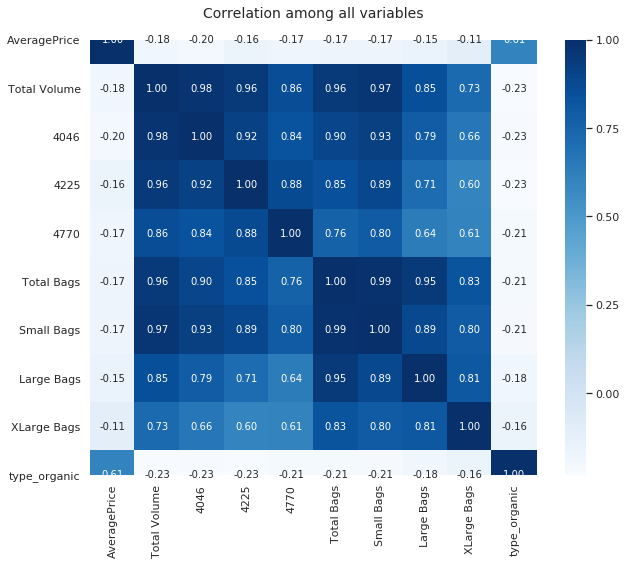

In [9]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'Blues')
plt.title('Correlation among all variables\n', fontsize = 14)
plt.show()

## Distribution of price by regions

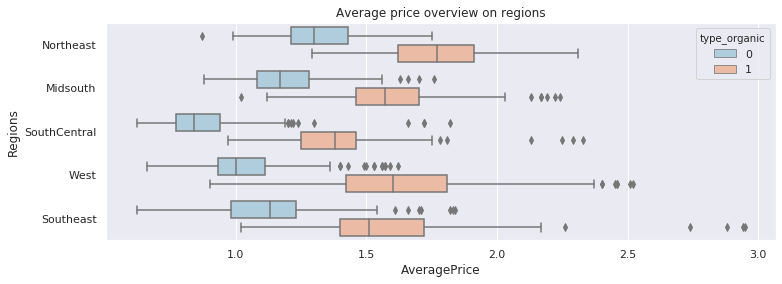

In [10]:
plt.figure(figsize = (12, 4))
sns.boxplot(x='AveragePrice', y='region', hue='type_organic', data=df_regions, palette='RdBu_r')
plt.title('Average price overview on regions')
plt.ylabel('Regions')
plt.show()

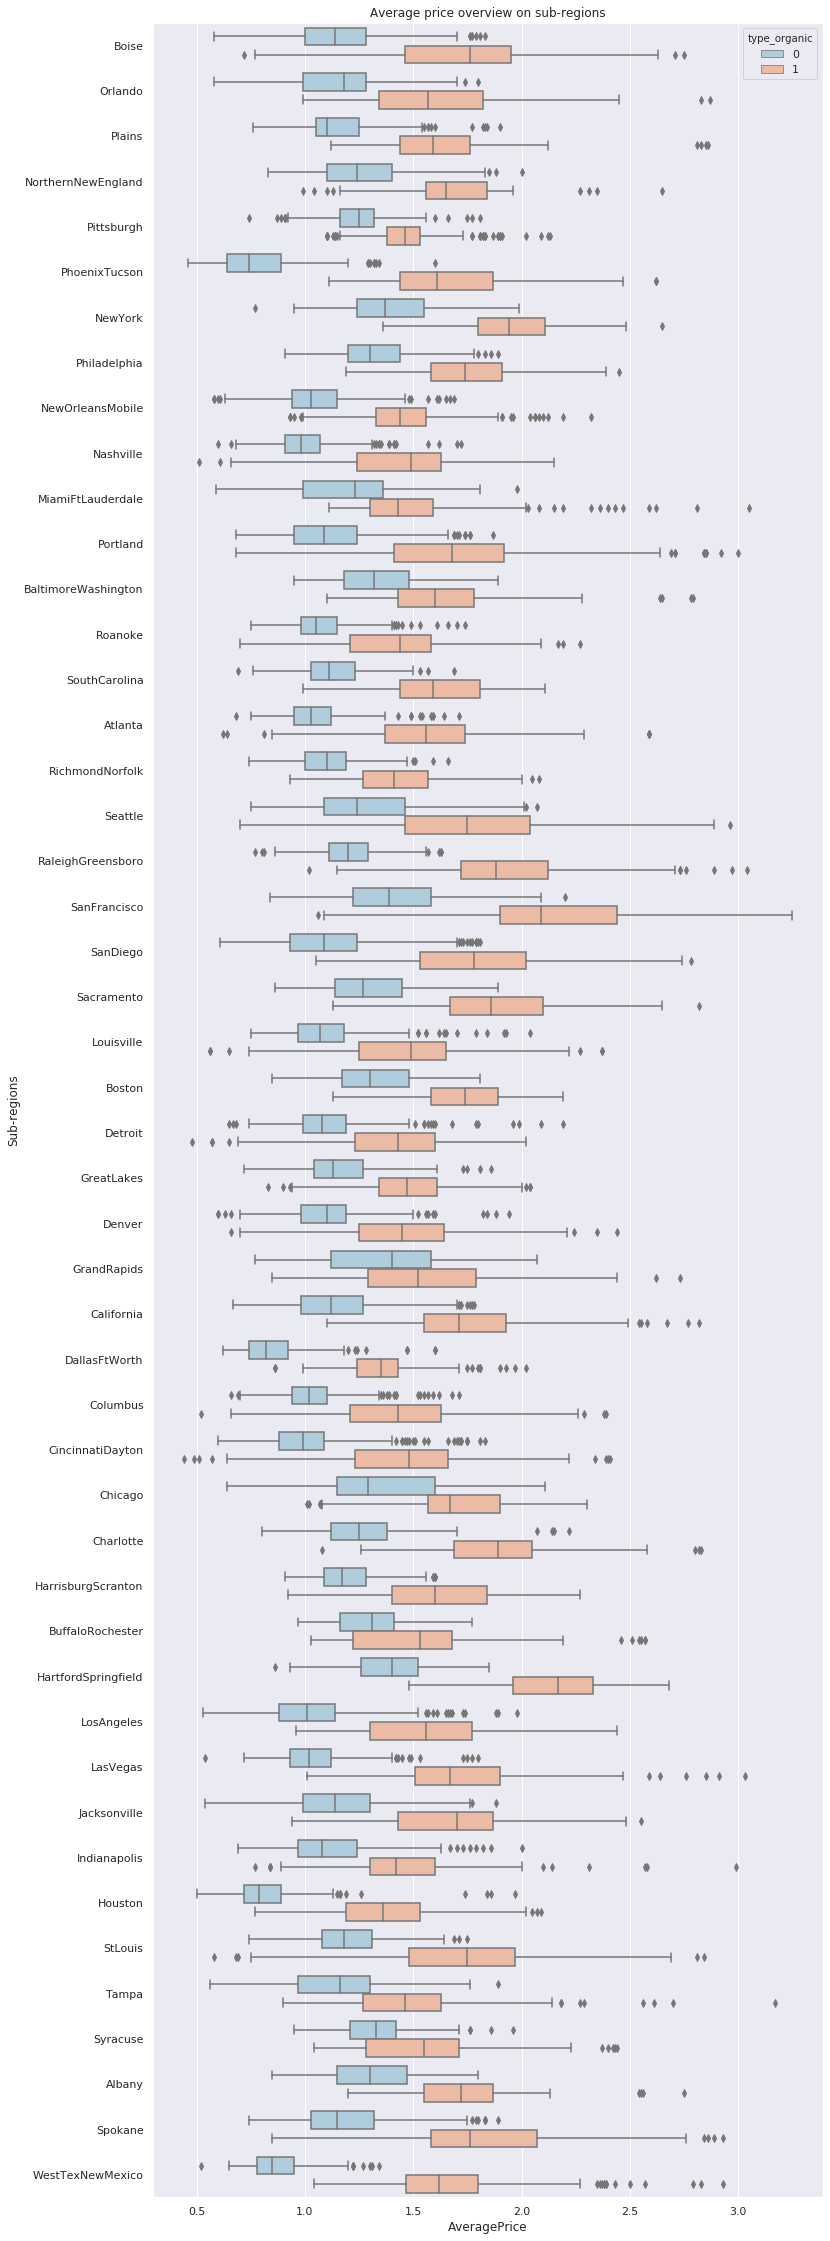

In [11]:
plt.figure(figsize = (12, 40))
sns.boxplot(x='AveragePrice', y='region', hue='type_organic', data=df_subregions, palette='RdBu_r')
plt.title('Average price overview on sub-regions')
plt.ylabel('Sub-regions')
plt.show()

## Ploting the time series

/home/rakib/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


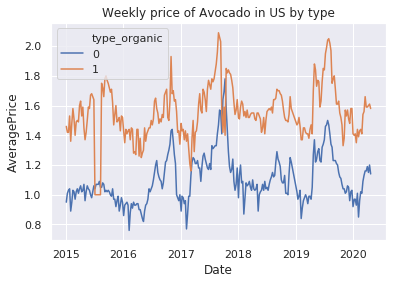

In [12]:
sns.lineplot(x=df_US.index, y='AveragePrice', hue='type_organic', data=df_US)
plt.title('Weekly price of Avocado in US by type')
plt.legend()
plt.show()

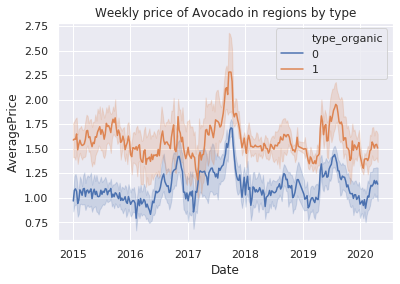

In [13]:
sns.lineplot(x=df_regions.index, y='AveragePrice', hue='type_organic', data=df_regions)
plt.title('Weekly price of Avocado in regions by type')
plt.legend()
plt.show()

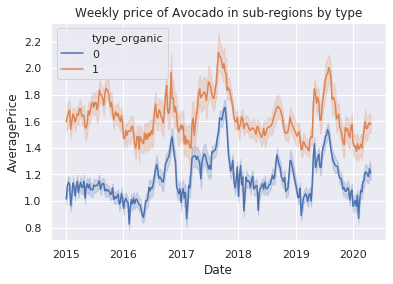

In [14]:
sns.lineplot(x=df_subregions.index, y='AveragePrice', hue='type_organic', data=df_subregions)
plt.title('Weekly price of Avocado in sub-regions by type')
plt.legend()
plt.show()

#### Obervations:
- These time series plots look pretty similar for US, regions and sub-regions. 

- Most of the prices in the year of 2015 were in the range of $1.0 for conventional avocados. While from 2016 and onwards the density of the prices were a little bit higher.  

- Most price peaks occur for both conventional and organic avocados between the months of September and October.  

- At the end of the year there is a major price drop for both type of avocados. 

- During the year of 2017 and 2019, the avocado market experienced the highest volatility for both conventional and organic avocados.  

- For both types of Avocados, we can see that there are always a price drop at the first four/five months of each year, but then it picked up the price in the next few months before droping again at the end of each year.

## Autocorrelation check

https://www.kaggle.com/janiobachmann/price-of-avocados-pattern-recognition-analysis

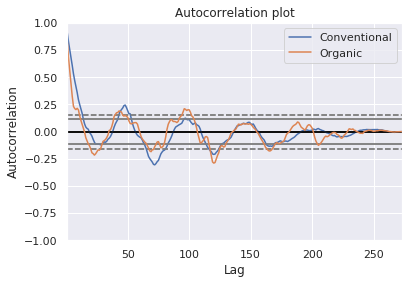

In [15]:
df_US_conventional = df_US[df_US['type_organic']==0]
df_US_organic = df_US[df_US['type_organic']==1]

pd.plotting.autocorrelation_plot(df_US_conventional['AveragePrice'].groupby(df_US_conventional.index).mean(), label='Conventional')
pd.plotting.autocorrelation_plot(df_US_organic['AveragePrice'].groupby(df_US_organic.index).mean(), label='Organic')
plt.title('Autocorrelation plot')
plt.legend()
plt.show()

The resulting plot contains a few lines on it. The dark horizontal line at zero just denotes the zero line, the lighter full horizontal lines are the 95% confidence level and the dashed horizontal lines are 99% confidence level, which means that correlations are more significant if they occur at those levels.  
From the plot above, we can see there’s some significant correlation between t=1 and t=15 (roughly) with significant decline in correlation after that timeframe.

## Stationarity test

A series is said to be stationary if the mean, variance and covariance is constant over period of time or time invarient.

### 1. Rolling statistics check

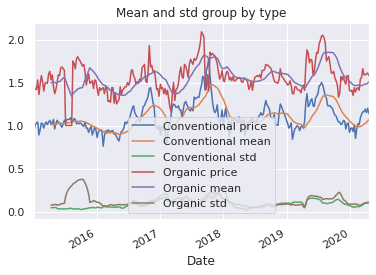

In [16]:
df_US_conventional['AveragePrice'].groupby(df_US_conventional.index).mean().plot(label='Conventional price')
df_US_conventional['AveragePrice'].rolling(window=15).mean().plot(label='Conventional mean')
df_US_conventional['AveragePrice'].rolling(window=15).std().plot(label='Conventional std')

df_US_organic['AveragePrice'].groupby(df_US_organic.index).mean().plot(label='Organic price')
df_US_organic['AveragePrice'].rolling(window=15).mean().plot(label='Organic mean')
df_US_organic['AveragePrice'].rolling(window=15).std().plot(label='Organic std')
plt.title('Mean and std group by type')
plt.legend()
plt.show()

### 2. Autocorrelation check

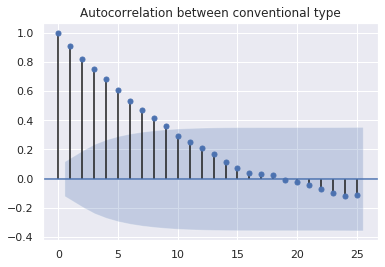

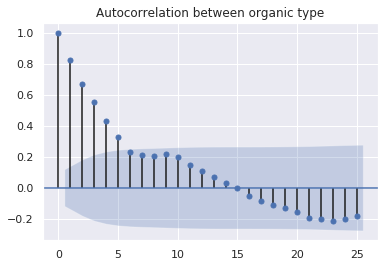

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

_ = plot_acf(df_US_conventional['AveragePrice'], title='Autocorrelation between conventional type')
_ = plot_acf(df_US_organic['AveragePrice'], title='Autocorrelation between organic type')

### 3. Dickey-Fuller test

In [18]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(df, name):
    dftest = adfuller(df)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','#Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(name + ':')
    print(dfoutput)

adfuller_test(df_US_conventional['AveragePrice'], 'Conventional type')
adfuller_test(df_US_organic['AveragePrice'], '\nOrganic type')

Conventional type:
Test Statistic           -3.664730
p-value                   0.004638
#Lags Used                0.000000
#Observations Used      272.000000
Critical Value (1%)      -3.454622
Critical Value (5%)      -2.872225
Critical Value (10%)     -2.572464
dtype: float64

Organic type:
Test Statistic           -5.126548
p-value                   0.000012
#Lags Used                0.000000
#Observations Used      272.000000
Critical Value (1%)      -3.454622
Critical Value (5%)      -2.872225
Critical Value (10%)     -2.572464
dtype: float64


# Transform the series into a stationary series

A non-stationary series can be made stationary by differencing. After differencing once, the series is called as integrated of order 1 and denoted by l(1).

In [19]:
df_US_conventional_diff = df_US_conventional['AveragePrice'].diff(periods=1)[1:]
df_US_organic_diff = df_US_organic['AveragePrice'].diff(periods=1)[1:]

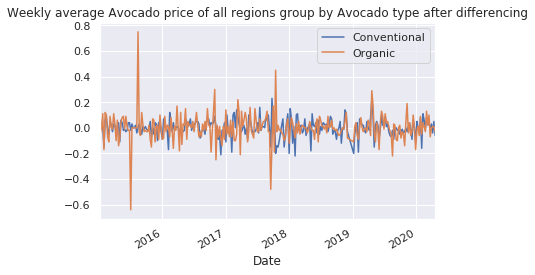

In [20]:
df_US_conventional_diff.plot(label='Conventional')
df_US_organic_diff.plot(label='Organic')
plt.title('Weekly average Avocado price of all regions group by Avocado type after differencing')
plt.legend()
plt.show()

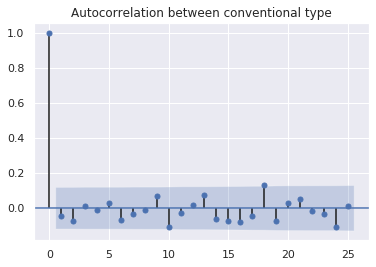

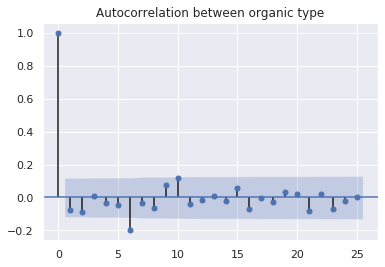

In [21]:
_ = plot_acf(df_US_conventional_diff, title='Autocorrelation between conventional type')
_ = plot_acf(df_US_organic_diff, title='Autocorrelation between organic type')

In [22]:
adfuller_test(df_US_conventional_diff, 'Conventional type')
adfuller_test(df_US_organic_diff, '\nOrganic type')

Conventional type:
Test Statistic         -1.717518e+01
p-value                 6.702909e-30
#Lags Used              0.000000e+00
#Observations Used      2.710000e+02
Critical Value (1%)    -3.454713e+00
Critical Value (5%)    -2.872265e+00
Critical Value (10%)   -2.572485e+00
dtype: float64

Organic type:
Test Statistic         -8.686492e+00
p-value                 4.149836e-14
#Lags Used              7.000000e+00
#Observations Used      2.640000e+02
Critical Value (1%)    -3.455365e+00
Critical Value (5%)    -2.872551e+00
Critical Value (10%)   -2.572638e+00
dtype: float64


# Create train and test data

In [30]:
split_percentage = 0.95 # 95% data will be selected for training
split_range_conventional = int(np.round(len(df_US_conventional_diff)*split_percentage))
split_range_organic = int(np.round(len(df_US_organic_diff)*split_percentage))

train_conventional = df_US_conventional_diff[:split_range_conventional].values
test_conventional = df_US_conventional_diff[split_range_conventional:].values
train_organic = df_US_organic_diff[:split_range_organic].values
test_organic = df_US_organic_diff[split_range_organic:].values

# Apply AutoRegressive(AR) model

Yt depends only the past values.  
Yt = f(Y(t-1), Y(t-2), Y(t-3)...)  
Yt = B0 + B1*Y(t-1) + B2*Y(t-2) + ...

In [32]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

def autoregressive(train_data, start, end):
    model = AR(train_data)
    model_fitted = model.fit()
    pred = model_fitted.predict(start=start, end=end)
    print('The lag value is: %s' % model_fitted.k_ar)
    print('The coefficients of the model are:\n %s\n' % model_fitted.params)
    return pred

pred_conventional = autoregressive(train_conventional, split_range_conventional, len(df_US_conventional)-1)
pred_organic = autoregressive(train_organic, split_range_organic, len(df_US_organic)-1)

The lag value is: 15
The coefficients of the model are:
 [-1.35961942e-04 -1.39555618e-02 -6.95462096e-02  4.63968754e-05
 -4.23835889e-02  1.78368430e-02 -7.92208149e-02 -1.67181488e-02
 -5.06996892e-02  6.18228391e-02 -1.04828952e-01 -3.24456290e-02
 -1.02987260e-02  7.59197841e-02 -8.94376875e-02 -6.02577944e-02]

The lag value is: 15
The coefficients of the model are:
 [-0.00080322 -0.1108927  -0.12208769 -0.02401982 -0.05559003 -0.09032911
 -0.2831436  -0.10980122 -0.11820477  0.05782485  0.08410712 -0.04703233
 -0.08388846 -0.03581232 -0.04964315  0.09350437]



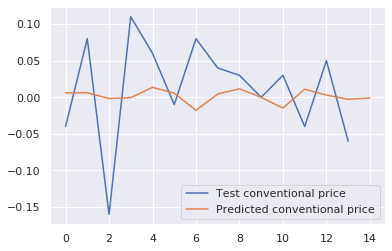

In [33]:
plt.plot(test_conventional, label='Test conventional price')
plt.plot(pred_conventional, label='Predicted conventional price')
plt.legend()
plt.show()

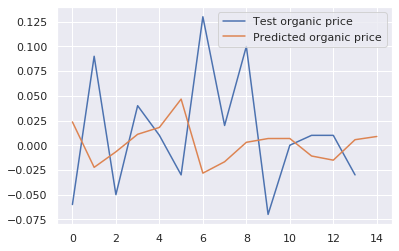

In [34]:
plt.plot(test_organic, label='Test organic price')
plt.plot(pred_organic, label='Predicted organic price')
plt.legend()
plt.show()

# Apply ARIMA model

Three integers (p, d, q) are typically used to parametrize ARIMA models.  
- p: number of autoregressive terms (AR order)  
- d: number of nonseasonal differences (differencing order)  
- q: number of moving-average terms (MA order)  

In [40]:
split_percentage = 0.95 # 95% data will be selected for training
split_range_conventional = int(np.round(len(df_US_conventional)*split_percentage))
split_range_organic = int(np.round(len(df_US_organic)*split_percentage))

train_conventional = df_US_conventional[:split_range_conventional]['AveragePrice'].values
test_conventional = df_US_conventional[split_range_conventional:]['AveragePrice'].values
train_organic = df_US_organic[:split_range_organic]['AveragePrice'].values
test_organic = df_US_organic[split_range_organic:]['AveragePrice'].values

In [41]:
from statsmodels.tsa.arima_model import ARIMA

def find_order(data, *param):
    try:
        model = ARIMA(data, order=param)
        model_fitted = model.fit()
        print(param, '->', model_fitted.aic)
    except Exception:
        pass

In [42]:
import itertools
import warnings
warnings.filterwarnings('ignore')

p = d = q = range(5)
pdq = list(itertools.product(p, d, q))
for param in pdq:
    find_order(train_conventional, *param)
print()
for param in pdq:
    find_order(train_organic, *param)

(0, 0, 0) -> -191.1527402355175
(0, 0, 1) -> -416.6641111498377
(0, 0, 2) -> -509.87241970822197
(0, 1, 0) -> -633.8924433946031
(0, 1, 1) -> -632.0825415027899
(0, 1, 2) -> -632.1113653638625
(0, 1, 3) -> -630.1133936093694
(0, 1, 4) -> -628.1239295002325
(0, 2, 0) -> -446.3841172310074
(0, 2, 1) -> -623.0594034070506
(1, 0, 0) -> -644.7792417038261
(1, 0, 1) -> -642.8982665524463
(1, 0, 2) -> -641.4293553453417
(1, 0, 3) -> -639.7246888771106
(1, 0, 4) -> -638.0728446186426
(1, 1, 0) -> -632.0488747854396
(1, 2, 0) -> -508.0158049609453
(1, 2, 1) -> -621.177120782395
(1, 2, 2) -> -623.1072185049992
(1, 2, 3) -> -621.7597512578071
(1, 2, 4) -> -620.6607106231532
(2, 0, 0) -> -642.8859877919217
(2, 0, 1) -> -645.1016869594707
(2, 0, 2) -> -643.1074970029099
(2, 0, 3) -> -641.2235965628449
(2, 0, 4) -> -639.2524890163957
(2, 1, 0) -> -632.0855330569901
(2, 1, 1) -> -630.1042124884506
(2, 1, 2) -> -639.721618414828
(2, 1, 3) -> -638.9748485740298
(2, 2, 0) -> -544.5716032655561
(2, 2, 1)

In [43]:
def arima(data, test_length, *param):
    model = ARIMA(data, order=param)
    model_fitted = model.fit()
    pred = model_fitted.forecast(steps=test_length)[0]
    return pred

In [44]:
pred_conventional = arima(train_conventional, len(test_conventional), *(4,0,3))
pred_organic = arima(train_organic, len(test_organic), *(4,0,4))

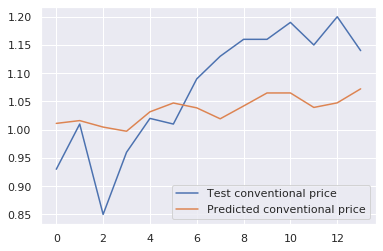

In [45]:
plt.plot(test_conventional, label='Test conventional price')
plt.plot(pred_conventional, label='Predicted conventional price')
plt.legend()
plt.show()

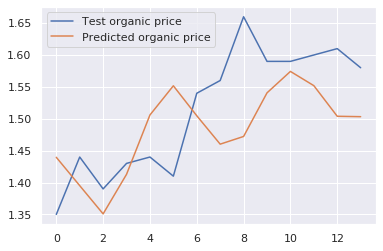

In [46]:
plt.plot(test_organic, label='Test organic price')
plt.plot(pred_organic, label='Predicted organic price')
plt.legend()
plt.show()